In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import torchaudio
from IPython import display as ipd

from src.domains.audio.dsp.audio import load_waveform
from src.utils.env import BASE_DIR
from src.utils.vizualization.audio import plot_transform

plt.style.use(BASE_DIR.joinpath("notebooks/white.mplstyle").as_posix())

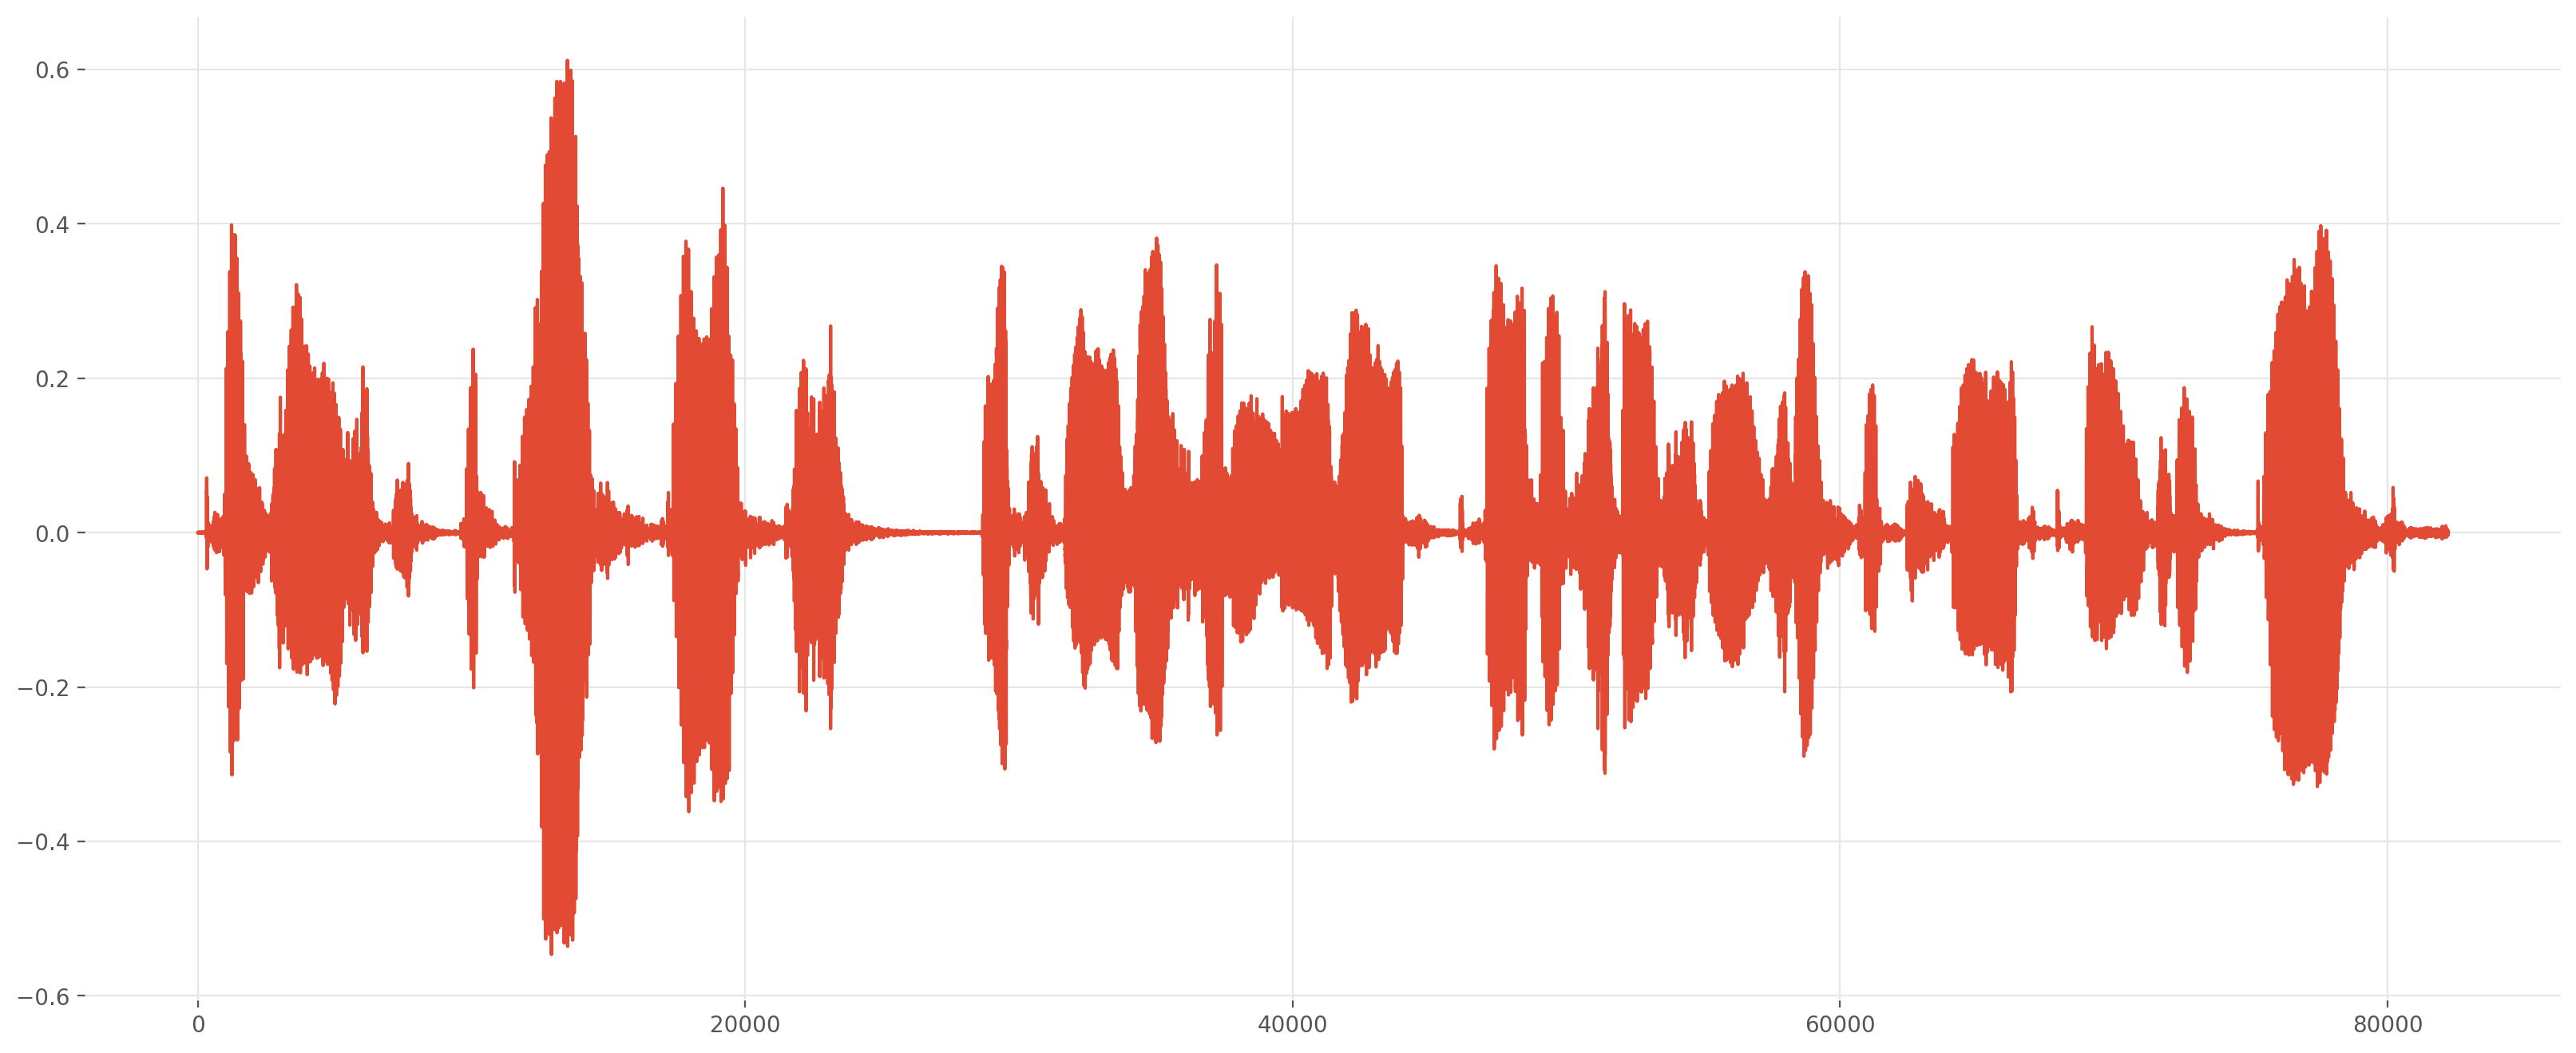

In [3]:
waveform = load_waveform(
    BASE_DIR.joinpath("tests/data/test.wav").as_posix(),
    sample_rate=16_000,
)

plt.figure(figsize=(20, 8))
plt.plot(waveform.squeeze().numpy())
ipd.Audio(waveform.numpy(), rate=16_000)

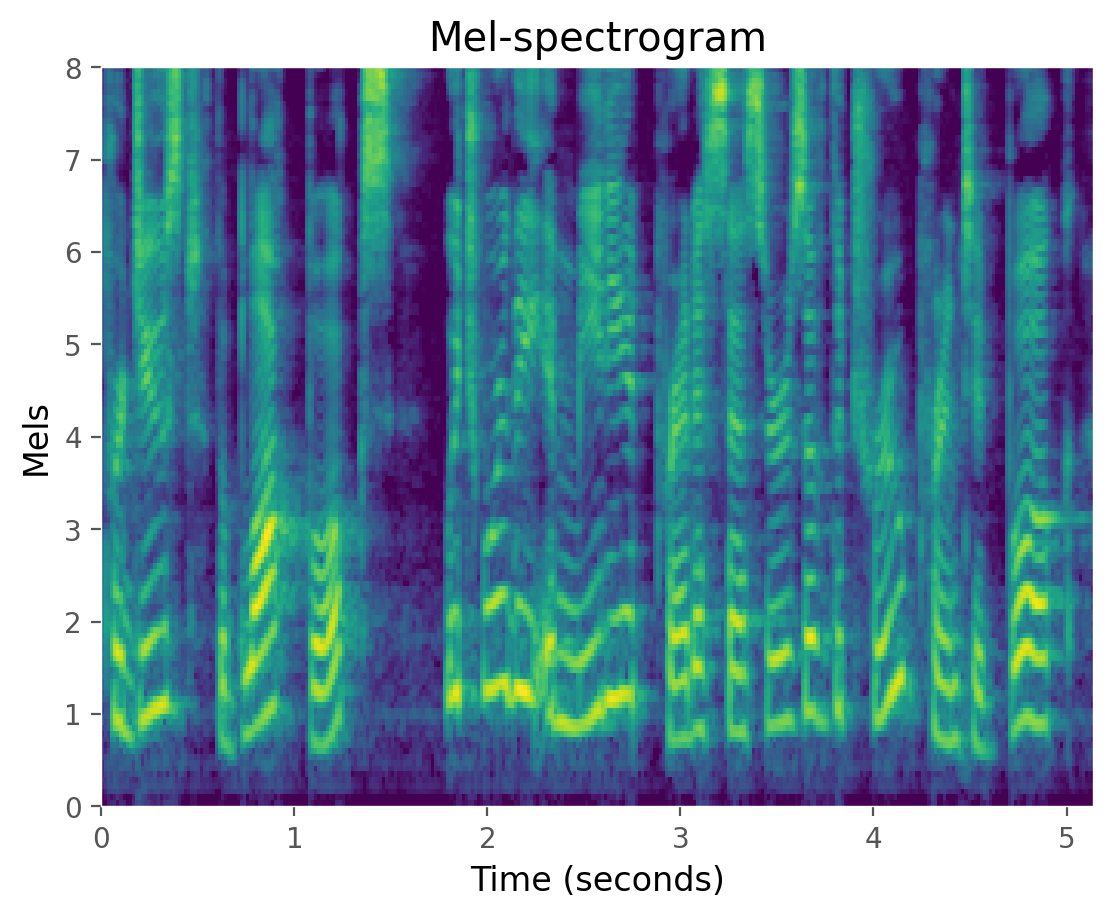

In [11]:
transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=16_000,
    f_min=0,
    f_max=8000,
    n_fft=1024,
    hop_length=256,
    n_mels=128,
)

amplitude_to_db = torchaudio.transforms.AmplitudeToDB(top_db=80)
mel_spec = transform(waveform)
mel_spec_db = amplitude_to_db(mel_spec)

plot_transform(
    mel_spec_db,
    title="Mel-spectrogram",
    x_label="Time (seconds)",
    y_label="Mels",
    sample_rate=16_000,
    audio_size=waveform.shape[-1],
)